In [28]:
from sympy import Symbol,solve
import numpy as np
import matplotlib.pyplot as plt
import random

%matplotlib inline
r_m=76.2
beta_T=0.82
h_0=2.46
c=0.005
x_f=26.6
beta_f=0.28
q_f=0.83
A=3.55
beta_g=beta_f
x_g=x_f
p=30
N=5000

In [29]:
# Structral connectivity matrix

#Firing rate pattern
xi_pattern=np.random.normal(0,1,size=(p,N))
r_pattern=r_m/(1+np.exp(-beta_T*(xi_pattern-h_0)))
print(r_pattern)
C=np.zeros((N,N),dtype='int8')
for i in range(N):
    for j in range(N):
        if random.uniform(0,1)<c:
            C[i,j]=1

[[11.39932062 20.95744761  5.90584133 ...  4.7074612   9.55612727
  16.9696055 ]
 [ 8.89104852  3.98922939  2.53434382 ...  7.06069153 11.49558448
  16.1473854 ]
 [ 8.05453058  5.31320651  5.48455988 ... 13.93102054  9.58120337
   3.41708773]
 ...
 [ 4.56326556 27.94564619  3.77922234 ...  7.57625899  8.45389423
   6.01844394]
 [ 5.6523613  28.96239111  7.26983891 ...  6.85865232 11.55408015
   6.66933906]
 [ 3.57757124 13.18625509 15.1154708  ...  4.56096135  8.19687357
   6.46340279]]


In [30]:
#x = Symbol('x')
#def func(z):
#    I=np.exp(-z**2/2)*(2*x-1+np.tanh(beta_g*(r_m/(1+np.exp(-beta_T*(z-h_0)))-x_g)))
#    return I
#Sum2=0
#for i in range(N):
#    Sum2=Sum2+func(xi_pattern[0,i])
#q_g=solve(Sum2,x)[0]
#print(q_g)

In [31]:
#Final connectivity matrix J
q_g=0.99
J=np.zeros((N,N))
def f(r):
    return 0.5*(2*q_f-1+np.tanh(beta_f*(r-x_f)))
def g(r):
    return 0.5*(2*q_g-1+np.tanh(beta_g*(r-x_g)))
#equation 2
Sum=np.zeros((N,N))
for k in range(p):
    Sum=Sum+np.dot(f(np.transpose(r_pattern[k])).reshape(N,1),g(r_pattern[k]).reshape(1,N))
J=A*C/c/N*Sum
for i in range(N):
    J[i,i]=0

In [32]:
# initial firing rate
r0=np.random.uniform(0,5,N)
#for i in range(p):
#    for j in range(N):
#        r0[j]=np.random.normal(r_pattern[i,j],1)
print(r0)

[0.03338675 0.28521586 3.43086734 ... 1.3288436  4.46821086 0.96540674]


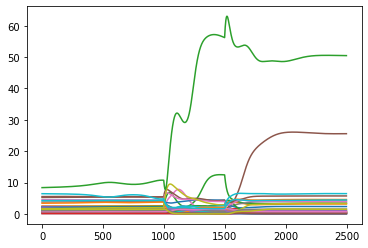

In [33]:
#Novel stimulus
t_p=1000
t_max=2500+t_p
r=np.zeros((N,t_max))
tau=20
t_pre=1000+t_p
t_delay=1500+t_p
dt=1
I0=1
ita=np.random.normal(0,1,size=N)
I=I0*ita
r[:,0]=r0
def phi(xi):
    return r_m/(1+np.exp(-beta_T*(xi-h_0)))
for t in range(1,t_pre):
    xi=np.dot(J,r[:,t-1])
    r[:,t]=r[:,t-1]+(-r[:,t-1]+phi(xi))/tau*dt #equation 1
for t in range(t_pre,t_delay):
    xi=np.dot(J,r[:,t-1])
    r[:,t]=r[:,t-1]+(-r[:,t-1]+phi(I+xi))/tau*dt #equation 1
for t in range(t_delay,t_max):
    xi=np.dot(J,r[:,t-1])
    r[:,t]=r[:,t-1]+(-r[:,t-1]+phi(xi))/tau*dt #equation 1
plt.figure()
for i in range(30):
    plt.plot(range(0,t_max-t_p),r[i,t_p:t_max])
plt.savefig('Figures/novel_stimulus.png')

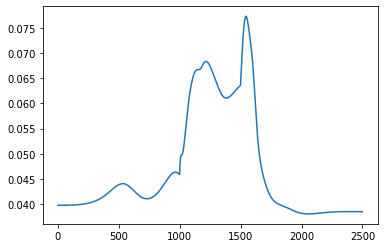

In [34]:
#Overlap
import scipy.stats
p_r=np.zeros(t_max-t_p)
for t in range(0,t_max-t_p):
    p_r[t]=scipy.stats.pearsonr(r[:,t+t_p],r_pattern[0])[0]
plt.figure()
plt.plot(range(0,t_max-t_p),p_r)
plt.savefig("Figures/overlap_novel.png")

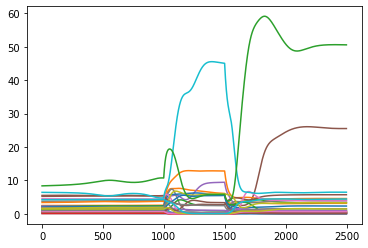

In [35]:
#Familiar Stimulus
I=I0*xi_pattern[0]
r[:,0]=r0
for t in range(1,t_pre):
    xi=np.dot(J,r[:,t-1])
    r[:,t]=r[:,t-1]+(-r[:,t-1]+phi(xi))/tau*dt #equation 1
for t in range(t_pre,t_delay):
    xi=np.dot(J,r[:,t-1])
    r[:,t]=r[:,t-1]+(-r[:,t-1]+phi(I+xi))/tau*dt #equation 1
for t in range(t_delay,t_max):
    xi=np.dot(J,r[:,t-1])
    r[:,t]=r[:,t-1]+(-r[:,t-1]+phi(xi))/tau*dt #equation 1
plt.figure()
for i in range(30):
    plt.plot(range(0,t_max-t_p),r[i,t_p:t_max])
plt.savefig('Figures/familiar_stimulus.png')

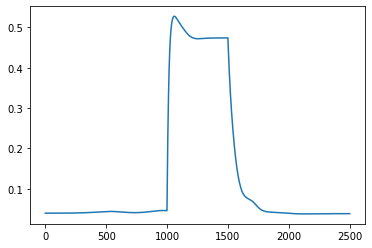

In [36]:
#Overlap
p_r=np.zeros(t_max-t_p)
for t in range(0,t_max-t_p):
    p_r[t]=scipy.stats.pearsonr(r[:,t+t_p],r_pattern[0])[0]
plt.figure()
plt.plot(range(0,t_max-t_p),p_r)
plt.savefig("Figures/overlap_familiar.png")